In [10]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import pydub
from pydub.playback import play

audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

sound = pydub.AudioSegment.from_mp3(audio_file_path)



In [16]:
import sounddevice as sd
import soundfile as sf

audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

data, fs = sf.read(audio_file_path, dtype='float32')
sd.play(data, fs)
sd.wait()


In [17]:
import pygame

audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

pygame.init()
pygame.mixer.music.load(audio_file_path)
pygame.mixer.music.play()

# Keep the program running until the music finishes playing
while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)


pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
import playsound

audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

playsound.playsound(audio_file_path)




In [18]:
from IPython.display import Audio

audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

Audio(audio_file_path)


In [1]:
import os
from typing import Optional

import librosa
import numpy as np
import torch

class AudioPreprocessor:
    def __init__(self, sample_rate: int = 16000, n_mfcc: int = 40, n_fft: int = 400, hop_length: int = 160):
        self.sample_rate = sample_rate
        self.n_mfcc = n_mfcc
        self.n_fft = n_fft
        self.hop_length = hop_length

    def preprocess_audio(self, audio_path: str) -> Optional[torch.Tensor]:
        """
        Preprocess the audio file and return the preprocessed features.

        Args:
            audio_path (str): Path to the audio file.

        Returns:
            torch.Tensor: Preprocessed audio features, or None if an error occurs.
        """
        try:
            # Load the audio file
            audio, _ = librosa.load(audio_path, sr=self.sample_rate)

            # Normalize the amplitude
            audio = librosa.util.normalize(audio)

            # Remove silence
            audio_trimmed, _ = librosa.effects.trim(audio)

            # Extract MFCC features
            mfccs = librosa.feature.mfcc(y=audio_trimmed, sr=self.sample_rate, n_mfcc=self.n_mfcc,
                                         n_fft=self.n_fft, hop_length=self.hop_length)

            # Normalize the MFCC features
            mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)

            # Convert to PyTorch tensor
            mfccs_tensor = torch.tensor(mfccs_normalized, dtype=torch.float32)

            return mfccs_tensor

        except Exception as e:
            print(f"Error processing audio file: {audio_path}")
            print(f"Error message: {str(e)}")
            return None

# Example usage
if __name__ == "__main__":
    audio_file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'

    if not os.path.isfile(audio_file_path):
        print("Invalid file path.")
        exit(1)

    preprocessor = AudioPreprocessor()
    preprocessed_features = preprocessor.preprocess_audio(audio_file_path)

    if preprocessed_features is not None:
        print("Preprocessed audio features:")
        print(preprocessed_features)
        print(f"Shape: {preprocessed_features.shape}")
        


Preprocessed audio features:
tensor([[-8.4840, -8.4840, -8.2234,  ..., -8.3309, -8.4840, -8.4840],
        [ 0.1008,  0.1008,  0.4425,  ...,  0.3055,  0.1008,  0.1008],
        [ 0.1008,  0.1008,  0.3707,  ...,  0.2721,  0.1008,  0.1008],
        ...,
        [ 0.1008,  0.1008,  0.0984,  ...,  0.0635,  0.1008,  0.1008],
        [ 0.1008,  0.1008,  0.0969,  ...,  0.0432,  0.1008,  0.1008],
        [ 0.1008,  0.1008,  0.0961,  ...,  0.0287,  0.1008,  0.1008]])
Shape: torch.Size([40, 2328])


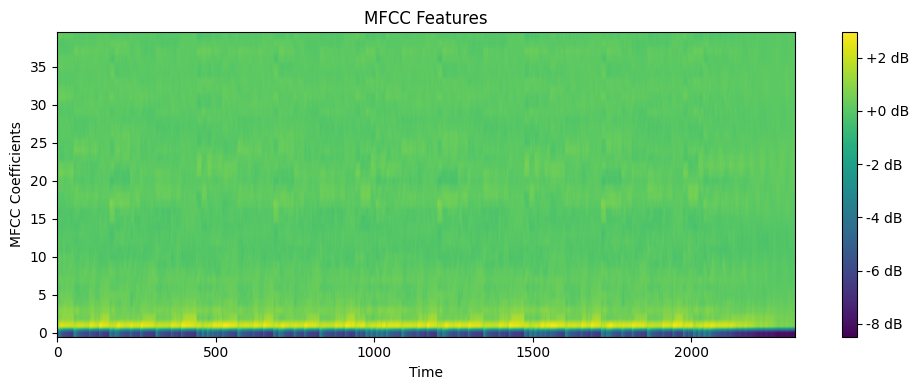

In [9]:
# Plot the MFCC features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.imshow(preprocessed_features.squeeze().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Features')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

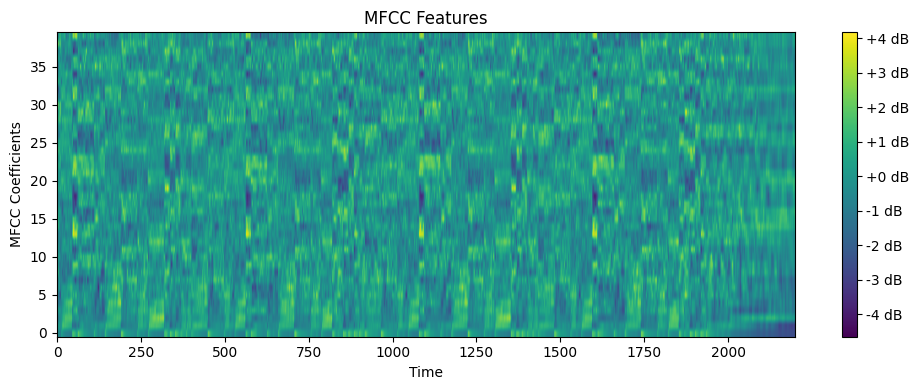

In [8]:
import torchaudio
import torchaudio.transforms as T
from typing import Tuple
import argparse
import os
import matplotlib.pyplot as plt

# Function to load and preprocess an audio file
def preprocess_audio(
    file_path: str,
    target_sample_rate: int = 16000,
    segment_size: float = 0.5
) -> Tuple:
    # Load audio file
    waveform, original_sample_rate = torchaudio.load(file_path)

    # Resample
    resampler = T.Resample(original_sample_rate, target_sample_rate)
    waveform = resampler(waveform)

    # Normalization
    waveform /= waveform.abs().max()

    # Silence Removal - Assuming silence is defined by a specific threshold
    # You may need a more sophisticated method for real-world applications
    waveform = torchaudio.transforms.Vad(sample_rate=target_sample_rate)(waveform)

    # Trimming - This can be combined with silence removal in real applications
    waveform = torchaudio.transforms.Vad(sample_rate=target_sample_rate)(waveform)

    # Segmentation - Here we're segmenting the waveform into chunks of segment_size seconds
    num_frames = int(segment_size * target_sample_rate)
    waveform = waveform[:, :num_frames * (waveform.size(1) // num_frames)]

    # Feature Extraction - Extracting MFCCs
    mfcc_transform = T.MFCC(
        sample_rate=target_sample_rate,
        n_mfcc=40,
        melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 40, "center":True}
    )
    mfcc = mfcc_transform(waveform)

    # Feature-wise Normalization - Per-feature normalization
    mfcc = (mfcc - mfcc.mean(dim=2, keepdim=True)) / mfcc.std(dim=2, keepdim=True)

    # Prepare for Model input - This step will be specific to your model's requirements
    # Here, we're just returning the MFCCs
    return mfcc


features = preprocess_audio( 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3')
features.shape

# Plot the MFCC features
plt.figure(figsize=(10, 4))
plt.imshow(features[0].squeeze().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Features')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [2]:
import os
import torch
import torchaudio
import librosa
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
# Constants for audio processing
TARGET_SAMPLE_RATE = 16000  # The sample rate expected by the model
NORMALIZATION_RANGE = (-1, 1)  # The range for amplitude normalization

def load_audio(file_path: str) -> Tuple[torch.Tensor, int]:
    """
    Load an audio file.

    :param file_path: Path to the audio file.
    :return: A tuple of the audio waveform (as a tensor) and the sample rate.
    """
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

def resample_audio(waveform: torch.Tensor, original_sample_rate: int, target_sample_rate: int = TARGET_SAMPLE_RATE) -> torch.Tensor:
    """
    Resample the audio waveform to a target sample rate.

    :param waveform: The original audio waveform.
    :param original_sample_rate: The original sample rate of the waveform.
    :param target_sample_rate: The target sample rate.
    :return: The resampled audio waveform.
    """
    if original_sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(original_sample_rate, target_sample_rate)
        waveform = resampler(waveform)
    return waveform

def normalize_waveform(waveform: torch.Tensor, normalization_range: Tuple[float, float] = NORMALIZATION_RANGE) -> torch.Tensor:
    """
    Normalize the amplitude of the audio waveform.

    :param waveform: The audio waveform.
    :param normalization_range: The range to normalize the waveform.
    :return: The normalized audio waveform.
    """
    max_val = torch.max(torch.abs(waveform))
    waveform = waveform / max_val
    waveform = waveform * (normalization_range[1] - normalization_range[0]) / 2
    return waveform

def remove_silence(waveform: torch.Tensor, sample_rate: int) -> torch.Tensor:
    """
    Remove silence from the audio waveform using librosa's trim function.

    :param waveform: The audio waveform.
    :param sample_rate: The sample rate of the waveform.
    :return: The waveform with leading and trailing silence removed.
    """
    waveform_np = waveform.numpy().squeeze()
    trimmed, _ = librosa.effects.trim(waveform_np, top_db=20)
    return torch.from_numpy(trimmed)

def segment_audio(waveform: torch.Tensor, frame_size: int, hop_length: int) -> torch.Tensor:
    """
    Segment the audio into frames.

    :param waveform: The audio waveform.
    :param frame_size: The size of each frame in samples.
    :param hop_length: The hop length for segmentation.
    :return: A tensor of segmented audio frames.
    """
    return librosa.util.frame(waveform.numpy().squeeze(), frame_length=frame_size, hop_length=hop_length)

def extract_features(waveform: torch.Tensor, sample_rate: int) -> torch.Tensor:
    """
    Extract Mel-Frequency Cepstral Coefficients (MFCCs) from the audio signal.

    :param waveform: The audio waveform.
    :param sample_rate: The sample rate of the waveform.
    :return: A tensor of extracted MFCC features.
    """
    mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=13)(waveform)
    return mfcc

def feature_normalization(features: torch.Tensor) -> torch.Tensor:
    """
    Normalize the features to have zero mean and unit variance.

    :param features: The features to normalize.
    :return: The normalized features.
    """
    mean = features.mean(dim=1, keepdim=True)
    std = features.std(dim=1, keepdim=True)
    normalized_features = (features - mean) / std
    return normalized_features
def plot_waveform(waveform, title):
    plt.figure(figsize=(10, 2))
    plt.title(title)
    plt.plot(waveform.numpy())
    plt.show()
def preprocess_audio(file_path: str) -> torch.Tensor:
    """
    Preprocess an audio file to be ready for model input.

    :param file_path: The path to the audio file.
    :return: Preprocessed audio features.
    """
    # Load the audio file
    waveform, original_sample_rate = load_audio(file_path)
    # Resample
    waveform = resample_audio(waveform, original_sample_rate)
    # Normalize waveform
    waveform = normalize_waveform(waveform)
    # Remove silence
    waveform = remove_silence(waveform, TARGET_SAMPLE_RATE)
    # Segment the audio (optional, defined by your model requirements)
    # waveform = segment_audio(waveform, frame_size, hop_length)
    # Extract features
    features = extract_features(waveform, TARGET_SAMPLE_RATE)
    # Normalize features
    normalized_features = feature_normalization(features)
    return normalized_features


if __name__ == "__main__":
    file_path = 'C:/Users/heman/Desktop/Deep learning/file_operations-/File_and_Operations/Coding_from_colab/smooth-ac-guitar-loop-93bpm-137706.mp3'
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    # Load the audio file
    waveform, original_sample_rate = load_audio(file_path)
    print(waveform.shape)
    # plot_waveform(waveform, "Original Waveform")
    
    # Resample
    waveform = resample_audio(waveform, original_sample_rate)
    print(waveform.shape)
    # plot_waveform(waveform, "Resampled Waveform")
    
    # Normalize waveform
    waveform = normalize_waveform(waveform)
    print(waveform.shape)
    # plot_waveform(waveform, "Normalized Waveform")
    
    # Remove silence
    waveform = remove_silence(waveform, TARGET_SAMPLE_RATE)
    print(waveform.shape)
    # plot_waveform(waveform, "Waveform with Silence Removed")
    
    # Extract features (assuming this is a spectrogram or similar)
    features = extract_features(waveform, TARGET_SAMPLE_RATE)
    print(features.shape)
    # plt.figure(figsize=(10, 4))
    # plt.title("Extracted Features")
    # plt.imshow(features.numpy(), aspect='auto', origin='lower')
    # plt.show()
    
    # Normalize features
    normalized_features = feature_normalization(features)
    # plt.figure(figsize=(10, 4))
    # plt.title("Normalized Features")
    # plt.imshow(normalized_features.numpy(), aspect='auto', origin='lower')
    # plt.show()

torch.Size([2, 1026432])
torch.Size([2, 372402])
torch.Size([2, 372402])
torch.Size([2, 341504])
torch.Size([2, 13, 1708])


c:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [ ]:
import torch
import torchaudio
from typing import Tuple
from torchaudio.transforms import Chroma, Spectrogram, PitchShift
from torchaudio.functional import zero_crossing_rate, spectral_contrast

def extract_features(waveform: torch.Tensor, sample_rate: int) -> Tuple[torch.Tensor, ...]:
    """
    Extract various audio features from the given waveform.

    Parameters:
    - waveform (torch.Tensor): The audio waveform.
    - sample_rate (int): The sample rate of the waveform.

    Returns:
    Tuple[torch.Tensor, ...]: A tuple containing tensors of the extracted audio features.

    The features extracted include:
    - Spectrogram
    - Chroma Features
    - Spectral Contrast
    - Zero Crossing Rate
    - RMS Energy
    - Pitch
    """

    # Spectrogram
    spectrogram = Spectrogram()(waveform)

    # Chroma Features
    chroma_transformer = Chroma(sample_rate=sample_rate)
    chroma = chroma_transformer(waveform)

    # Spectral Contrast
    contrast = spectral_contrast(waveform, sample_rate)

    # Zero Crossing Rate
    zcr = zero_crossing_rate(waveform)

    # RMS Energy
    rms_energy = torch.sqrt(torch.mean(waveform**2, dim=-1, keepdim=True))

    # Pitch
    # Note: Pitch detection algorithms are complex and may require additional implementation.
    # For the purpose of this example, we will use a placeholder tensor.
    pitch = torch.tensor([])  # Placeholder for actual pitch detection

    return spectrogram, chroma, contrast, zcr, rms_energy, pitch

# Example usage:
# waveform, sample_rate = torchaudio.load('path_to_audio_file.wav')
# features = extract_features(waveform, sample_rate)